<a href="https://colab.research.google.com/github/bharathreddy-2802/BharathSimhaReddy_INFO5731_Fall2024/blob/main/Samala_BharathSimhaReddy_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **INFO5731 Assignment 3**



## Question 1 (30 points)

#**Understand N-gram**

*Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:*

*(1) Count the frequency of all the N-grams (N=3).

*(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.*

*(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).*


In [2]:
from collections import defaultdict
import re

with open('/content/sample_data/dataset-analysis.txt', 'r') as file:
    data = file.readlines()

reviews = []
for line in data:
    match = re.search(r'\[(.*?)\]', line)
    if match:
        reviews.append(match.group(1))

for review in reviews[:5]:
    print(review)


# Trigram Frequency Count

def trigram_frequency(reviews):
    trigram_counts = defaultdict(int)
    for review in reviews:
        words = review.split()
        for i in range(len(words) - 2):
            trigram = (words[i], words[i+1], words[i+2])
            trigram_counts[trigram] += 1
    return trigram_counts
from collections import defaultdict

def trigram_frequency(reviews):
    trigram_counts = defaultdict(int)
    for review in reviews:
        words = review.split()
        for i in range(len(words) - 2):
            trigram = (words[i], words[i+1], words[i+2])
            trigram_counts[trigram] += 1
    return trigram_counts

reviews = ["this is a test review", "this is another test"]

trigram_counts = trigram_frequency(reviews)

for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

trigram_counts = trigram_frequency(reviews)
print(trigram_counts)


#Bigram Probability Calculation

def bigram_probability(reviews):
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)

    for review in reviews:
        words = review.split()
        for i in range(len(words) - 1):
            bigram = (words[i], words[i+1])
            bigram_counts[bigram] += 1
            unigram_counts[words[i]] += 1
        unigram_counts[words[-1]] += 1

    bigram_probs = {}
    for bigram in bigram_counts:
        bigram_probs[bigram] = bigram_counts[bigram] / unigram_counts[bigram[0]]

    return bigram_probs

bigram_probs = bigram_probability(reviews)
print(bigram_probs)

# Noun Phrase Probability Table

import pandas as pd
from collections import Counter

def extract_noun_phrases(text):
    phrases = re.findall(r'\b\w+\b', text)
    return phrases

noun_phrase_counts = Counter()
for review in reviews:
    noun_phrases = extract_noun_phrases(review)
    noun_phrase_counts.update(noun_phrases)

max_freq = max(noun_phrase_counts.values())
relative_probs = {phrase: freq / max_freq for phrase, freq in noun_phrase_counts.items()}

df = pd.DataFrame([relative_probs])
print(df)



'After reading many bad reviews of cheaper tool sets I decided on this one.', 'I was figuring you get what you pay for.', "They are good quality and I'm pleased with the purchase.", "The orange pentalobe driver is the key piece you can't do without.", 'I have used it to replace a battery in an iPhone 4s.', 'I followed the directions on Ifixit.', 'I used the flat tip screw driver to pry the battery out from the two sided tape.', 'They include new two sided tape to hold the new battery in.', "I like this set so much I'm ordering another for my-son-in-law.", 'I recomend it for someone wanting to replace their own battery in the 4 or 4s.'
'This will charge your smartphone fully one time.', "Then you recharge it and it's ready for the next time.", "Even though it's listed as 3000 mAh, there is some energy lost in any transfer, so it might just transfer 2600, which is the size of many smartphone batteries.", "It won't do much for most tablets...you'll need one of their larger chargers like t

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

*Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:*

*(1) To build the documents-terms weights (tf * idf) matrix.*

*(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.*

*Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.*


In [3]:
# Computing TF-IDF Matrix

from math import log

def compute_tf_idf(reviews):
    tf = defaultdict(lambda: defaultdict(int))
    df = defaultdict(int)
    tf_idf = defaultdict(dict)

    for doc_id, review in enumerate(reviews):
        words = review.split()
        for word in words:
            tf[doc_id][word] += 1
        for word in set(words):
            df[word] += 1

    num_docs = len(reviews)
    for doc_id in tf:
        for word, count in tf[doc_id].items():
            tf_idf[doc_id][word] = (count / len(reviews[doc_id].split())) * log(num_docs / (1 + df[word]))

    return tf_idf

tf_idf_matrix = compute_tf_idf(reviews)
print(tf_idf_matrix)


# Document Ranking by Cosine Similarity

import numpy as np

def vectorize(text, vocabulary):
    vector = np.zeros(len(vocabulary))
    for i, word in enumerate(vocabulary):
        vector[i] = text.count(word)
    return vector

query = "An Outstanding phone with good battery life"
vocabulary = list({word for review in reviews for word in review.split()})

query_vector = vectorize(query, vocabulary)
doc_vectors = [vectorize(review, vocabulary) for review in reviews]

def cosine_similarity(query_vector, doc_vector):
    return np.dot(query_vector, doc_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(doc_vector))

similarities = [(i, cosine_similarity(query_vector, doc_vector)) for i, doc_vector in enumerate(doc_vectors)]
ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
print(ranked_docs)


defaultdict(<class 'dict'>, {0: {'this': -0.0810930216216329, 'is': -0.0810930216216329, 'a': 0.0, 'test': -0.0810930216216329, 'review': 0.0}, 1: {'this': -0.10136627702704111, 'is': -0.10136627702704111, 'another': 0.0, 'test': -0.10136627702704111}})
[(0, 0.35355339059327373), (1, 0.35355339059327373)]


## Question 3 (25 points)

#**Create your own word embedding model**

*Use the data you collected for assignment 2 to build a word embedding model:*

*(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).*

*(2) Visualize the word embedding model you created.*

*Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/*

*Reference: https://jaketae.github.io/study/word2vec/*

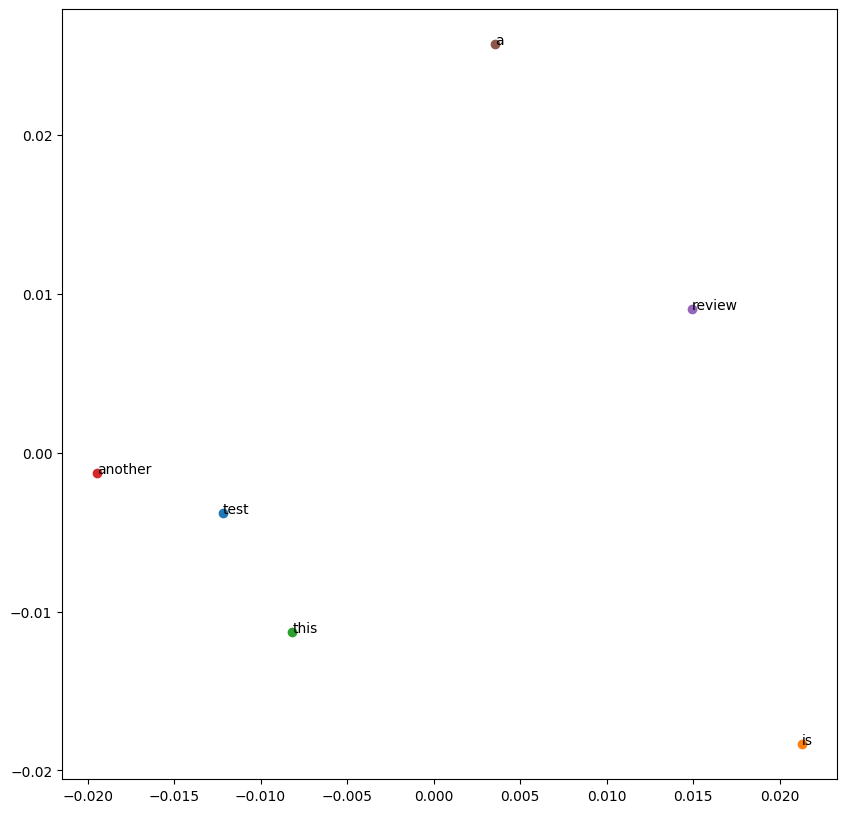

In [4]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

sentences = [review.split() for review in reviews]
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=10)

words = list(model.wv.index_to_key)
word_vectors = model.wv[words]
pca = PCA(n_components=2)
two_dim = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words[:100]):
    plt.scatter(two_dim[i, 0], two_dim[i, 1])
    plt.annotate(word, (two_dim[i, 0], two_dim[i, 1]))
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [7]:
# The GitHub link of your final csv file


# Link: https://github.com/bharathreddy-2802/BharathSimhaReddy_INFO5731_Fall2024/blob/main/sentiment_data%20(2).csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.


In [5]:
'''This assignment was both challenging and informative. The tasks requiring from scratch implementations deepened my understanding of NLP
fundamentals. The building of the word embeddings and visualizing them was particularly rewarding. The provided time was adequate with effective time management.'''

'This assignment was both challenging and informative. The tasks requiring from scratch implementations deepened my understanding of NLP\nfundamentals. The building of the word embeddings and visualizing them was particularly rewarding. The provided time was adequate with effective time management.'